In [1]:
# Is there a correlation between the usage of certain distribution channels and successful bookings? Are there significant differences in cancellations? Which agents have the most success/are used the most?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
hotel_csv = pd.read_csv("./Resources/hotel_bookings.csv")
agent_columns = ['distribution_channel', 'previous_cancellations', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'reservation_status']
agent_columns_df = hotel_csv[agent_columns]
agent_columns_df['agent'].fillna(0, inplace=True)
agent_columns_df['company'].fillna(0, inplace=True)
agent_columns_df.to_csv('agent_booking.csv', index=False)


C:\Users\sammy\AppData\Local\Temp\ipykernel_4124\3234497803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['agent'].fillna(0, inplace=True)
C:\Users\sammy\AppData\Local\Temp\ipykernel_4124\3234497803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['company'].fillna(0, inplace=True)


In [4]:
agent_csv = pd.read_csv("agent_booking.csv")
agent_csv['agent'] = agent_csv['agent'].astype(int)
agent_csv['company'] = agent_csv['company'].astype(int)
agent_csv.head(10)

,distribution_channel,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,reservation_status
0,Direct,0,3,0,0,0,Check-Out
1,Direct,0,4,0,0,0,Check-Out
2,Direct,0,0,0,0,0,Check-Out
3,Corporate,0,0,304,0,0,Check-Out
4,TA/TO,0,0,240,0,0,Check-Out
5,TA/TO,0,0,240,0,0,Check-Out
6,Direct,0,0,0,0,0,Check-Out
7,Direct,0,0,303,0,0,Check-Out
8,TA/TO,0,0,240,0,0,Canceled
9,TA/TO,0,0,15,0,0,Canceled


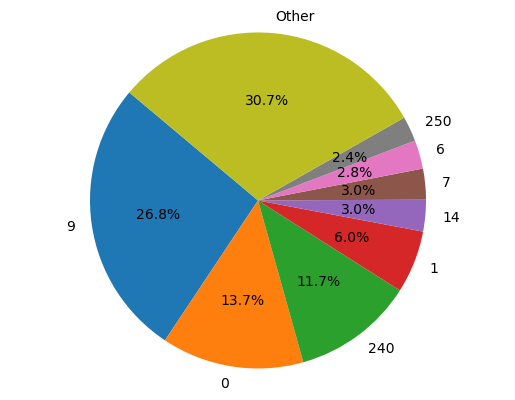

In [57]:

agent_value_counts = agent_csv['agent'].value_counts()
agent_dict = agent_value_counts.to_dict()

# Shows the agents above 2% of the total and groups the rest into an 'Other' section
agent_threshold = 2
total_sum = sum(agent_dict.values())
agent_filtered = {key: value for key, value in agent_dict.items() if (value / total_sum) * 100 >= agent_threshold}
agent_filtered_sum = sum(agent_filtered.values())
agent_filtered['Other'] = total_sum - agent_filtered_sum


plt.pie(agent_filtered.values(), labels=agent_filtered.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.savefig('Agent_Distribution.png')
plt.show()

In [6]:
# consider guests that have checked out as a successful booking
successful_bookings = "Check-Out"
# consider guests that have canceled or no-showed as a failed booking
failed_bookings = "Canceled" or "No-Show"
# sets the agents that contributed to over 2% of the total bookings
agent_1 = 1
agent_9 = 9
agent_240 = 240
agent_14 = 14
agent_7 = 7
agent_6 = 6
agent_250 = 250
# agent 0 are the ones that used no agents
agent_0 = 0

# Gets a value_count of all the Agents that are above 2% of the total
agent_1_success = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == successful_bookings)]
agent_1_success_value_count = agent_1_success.shape[0]

agent_1_failure = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == failed_bookings)]
agent_1_failure_value_count = agent_1_failure.shape[0]

agent_9_success = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == successful_bookings)]
agent_9_success_value_count = agent_9_success.shape[0]

agent_9_failure = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == failed_bookings)]
agent_9_failure_value_count = agent_9_failure.shape[0]

agent_0_success = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == successful_bookings)]
agent_0_success_value_count = agent_0_success.shape[0]


agent_0_failure = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == failed_bookings)]
agent_0_failure_value_count = agent_0_failure.shape[0]

agent_240_success = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == successful_bookings)]
agent_240_success_value_count = agent_240_success.shape[0]

agent_240_failure = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == failed_bookings)]
agent_240_failure_value_count = agent_240_failure.shape[0]

agent_14_success = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == successful_bookings)]
agent_14_success_value_count = agent_14_success.shape[0]

agent_14_failure = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == failed_bookings)]
agent_14_failure_value_count = agent_14_failure.shape[0]

agent_7_success = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == successful_bookings)]
agent_7_success_value_count = agent_7_success.shape[0]

agent_7_failure = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == failed_bookings)]
agent_7_failure_value_count = agent_7_failure.shape[0]

agent_6_success = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == successful_bookings)]
agent_6_success_value_count = agent_6_success.shape[0]

agent_6_failure = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == failed_bookings)]
agent_6_failure_value_count = agent_6_failure.shape[0]

agent_250_success = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == successful_bookings)]
agent_250_success_value_count = agent_250_success.shape[0]

agent_250_failure = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == failed_bookings)]
agent_250_failure_value_count = agent_250_failure.shape[0]

other_agents_df_success = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_0, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == successful_bookings)]
other_agents_success_value_count = other_agents_df_success.shape[0]


# Gets a value_count of all the other Agents

other_agents_df_failure = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_0, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == failed_bookings)]
other_agents_failure_value_count = other_agents_df_failure.shape[0]

# print(f"Other Agent's Failures are {other_agents_failure_value_count}")


Percentage of Agent Direct Success:  76.29%
Percentage of Agent 1 Success:  26.57%
Percentage of Agent 6 Success:  69.01%
Percentage of Agent 7 Success:  87.30%
Percentage of Agent 9 Success:  59.19%
Percentage of Agent 14 Success:  84.07%
Percentage of Agent 240 Success:  61.05%
Percentage of Agent 250 Success:  83.05%
Percentage of Agent Other Success:  61.65%
[76.29, 26.57, 69.01, 87.3, 59.19, 84.07, 61.05, 83.05, 61.65]


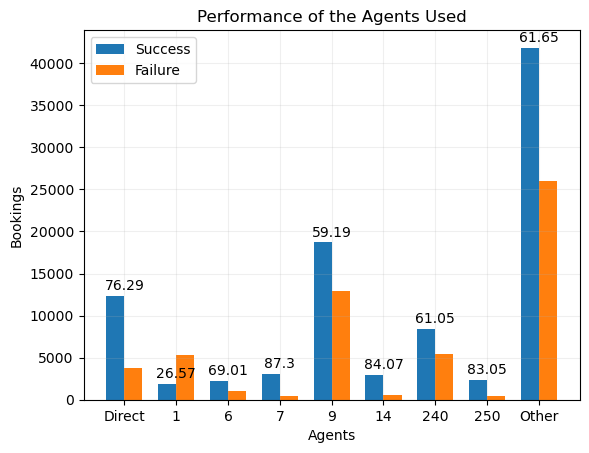

In [56]:
# Makes a dictionary from the previously obtained value counts
agent_success_dict = {'Direct':agent_0_success_value_count, '1':agent_1_success_value_count, '6':agent_6_success_value_count, '7':agent_7_success_value_count,
                      '9':agent_9_success_value_count, '14':agent_14_success_value_count, '240':agent_240_success_value_count, '250':agent_250_success_value_count,
                      'Other':other_agents_success_value_count}
agent_failure_dict = {'Direct':agent_0_failure_value_count, '1':agent_1_failure_value_count, '6':agent_6_failure_value_count, '7':agent_7_failure_value_count,
                      '9':agent_9_failure_value_count, '14':agent_14_failure_value_count, '240':agent_240_failure_value_count, '250':agent_250_failure_value_count,
                      'Other':other_agents_failure_value_count}
agent_success_list = [agent_0_success_value_count, agent_1_success_value_count, agent_6_success_value_count, agent_7_success_value_count,
                      agent_9_success_value_count, agent_14_success_value_count, agent_240_success_value_count, agent_250_success_value_count,
                      other_agents_success_value_count]
agent_failure_list = [agent_0_failure_value_count, agent_1_failure_value_count, agent_6_failure_value_count, agent_7_failure_value_count,
                      agent_9_failure_value_count, agent_14_failure_value_count, agent_240_failure_value_count, agent_250_failure_value_count,
                      other_agents_failure_value_count]
# Gets the X and Y values for the successful bookings to use in the chart
agent_success_keys = agent_success_dict.keys()
agent_success_values = agent_success_dict.values()

# Gets the X and Y values for the failed bookings to use in the chart
agent_failure_keys = agent_failure_dict.keys()
agent_failure_values = agent_failure_dict.values()

# Plotting the data on a bar graph
agent_x_axis = np.arange(len(agent_success_keys))
bar_width = 0.35
agent_tick_locations = [value for value in agent_x_axis]

success_percentage_list = []
for value1, value2, key1 in zip(agent_success_dict.values(), agent_failure_dict.values(), agent_success_dict.keys()):
    success_percentage = round((value1/(value1 + value2)) * 100, 2)
    success_percentage_list.append(success_percentage)
    print(f"Percentage of Agent {key1} Success: {success_percentage: .2f}%")
print(success_percentage_list)

for i in range(len(agent_success_keys)):
    plt.text(i, agent_success_list[i] + 700, success_percentage_list[i], ha='center')

plt.xticks(agent_tick_locations, agent_success_keys)
plt.bar(agent_x_axis - bar_width/2, agent_success_values, bar_width, label='Success')
plt.bar(agent_x_axis + bar_width/2, agent_failure_values, bar_width, label='Failure')
plt.legend()
plt.xlabel('Agents')
plt.ylabel('Bookings')
plt.title('Performance of the Agents Used')
plt.grid(alpha=0.2)
plt.savefig('Agent_Performance.png')
plt.show()





dict_values([12310, 1911, 2265, 3065, 18697, 2988, 8438, 2357, 41832])

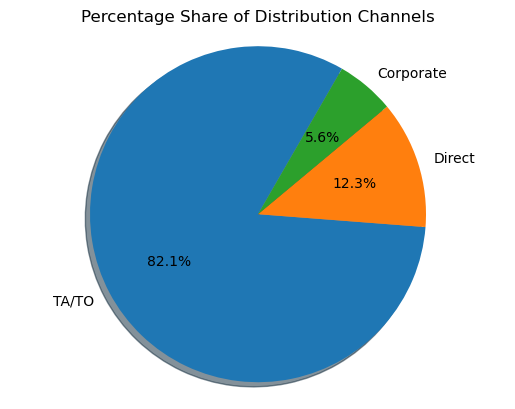

In [58]:
dchannel_value_counts = agent_csv['distribution_channel'].value_counts()
dchannel_dict = dchannel_value_counts.to_dict()

dchannel_keys = dchannel_dict.keys()
dchannel_values = dchannel_dict.values()

# Filtering out the less than 1% of insignificant data
dchannel_threshold = 5
total_dchannel_sum = sum(dchannel_values)
filtered_dchannel_values = [value for value in dchannel_values if (value / total_dchannel_sum) * 100 >= dchannel_threshold]
filtered_labels = [label for value, label in zip(dchannel_values, dchannel_keys) if (value / total_dchannel_sum) * 100 >= dchannel_threshold]

plt.pie(filtered_dchannel_values, labels=filtered_labels, autopct='%1.1f%%', startangle=60, shadow=True)
plt.axis('equal')
plt.title('Percentage Share of Distribution Channels')
plt.savefig('Dchannel_Distribution.png')
plt.show()

In [10]:
# Making a list for the successes/failures of distribution channels
dchannel_1 = 'TA/TO'
dchannel_2 = 'Direct'
dchannel_3 = 'Corporate'

dchannel_1_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_1) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_1_success_value_count = dchannel_1_success.shape[0]

dchannel_1_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_1) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_1_failure_value_count = dchannel_1_failure.shape[0]

dchannel_2_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_2) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_2_success_value_count = dchannel_2_success.shape[0]

dchannel_2_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_2) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_2_failure_value_count = dchannel_2_failure.shape[0]

dchannel_3_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_3) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_3_success_value_count = dchannel_3_success.shape[0]

dchannel_3_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_3) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_3_failure_value_count = dchannel_3_failure.shape[0]


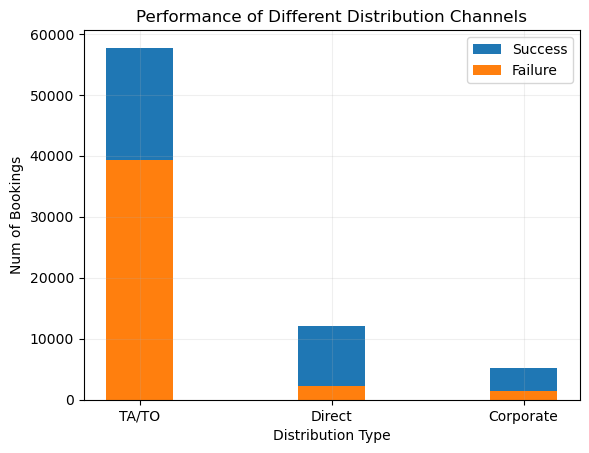

In [61]:
dchannel_key_list = [dchannel_1, dchannel_2, dchannel_3]
dchannel_success_value_list = [dchannel_1_success_value_count, dchannel_2_success_value_count, dchannel_3_success_value_count]
dchannel_failure_value_list = [dchannel_1_failure_value_count, dchannel_2_failure_value_count, dchannel_3_failure_value_count]

bar_width = 0.35
plt.bar(dchannel_key_list, dchannel_success_value_list, width=bar_width, label='Success')
plt.bar(dchannel_key_list, dchannel_failure_value_list, width=bar_width, label='Failure')

plt.xlabel('Distribution Type')
plt.ylabel('Num of Bookings')
plt.title('Performance of Different Distribution Channels')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig('Dchannel_Performance.png')
plt.show()